In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1. Create the image of a paraboloid with one axis scaled (like an oval paraboloid).
2. Create the image of a rotated sin(x) using rotation of coordinates.
3. Create the image of a gaussian in 2D.
4. Create a function that generates the image of a Gaussian optionally rotated by an angle \theta and with mx, my, sx, sy as input arguments.


Suggestion: Use numpy.linspace() and numpy.meshgrid() to generate the images.

In [ ]:
# plotagem em 3d, gerado pelas matrizes do mashgrid
def plot3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot(x,y,z)
    ax.plot_surface(x, y, z, cmap="plasma", antialiased=True, cstride=2, rstride=2)
    plt.title(title)
    plt.show()

In [ ]:
# plotagem em 2d dos níveis, gerado pelas matrizes do mashgrid
def plotContourf(x, y, z, title):
    fig = plt.figure(figsize=(10, 10))
    #fig.set_size_inches(19, 7)
    #plt.plot(x, y)
    plt.contourf(x, y, z)
    #plt.imshow(z)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('scaled')
    plt.colorbar()
    
    plt.show()

In [ ]:
def normalize(x):
    normalized = (255-0)*(x - x.min())/(x.max()-x.min()) + 0
    return normalized.astype(int)

1. Create the image of a paraboloid with one axis scaled (like an oval paraboloid).

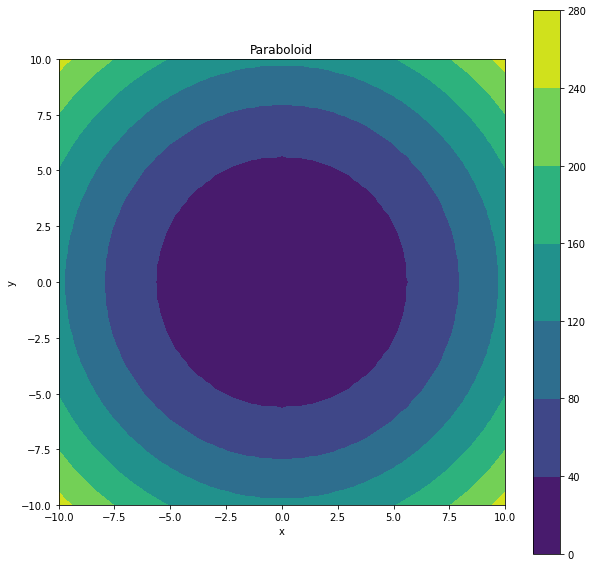

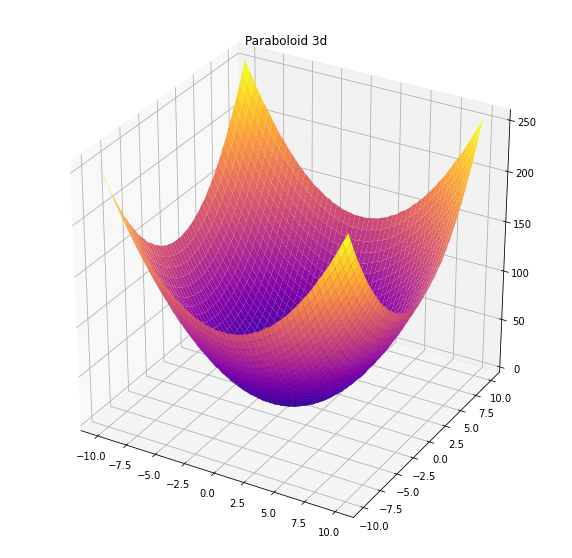

In [ ]:
x = np.linspace(-10, 10, 101)
y = np.linspace(-10, 10, 101)

xx, yy = np.meshgrid(x, y)
#print(x)
#print(y)
#print(xv.shape)
#print(xv)
#print(yv.shape)
#print(yv)
zz = xx**2 + yy**2
#print(zv)
plotContourf(xx, yy, normalize(zz), "Paraboloid")
plot3d(xx, yy, normalize(zz), "Paraboloid 3d")

2. Create the image of a rotated sin(x) using rotation of coordinates.

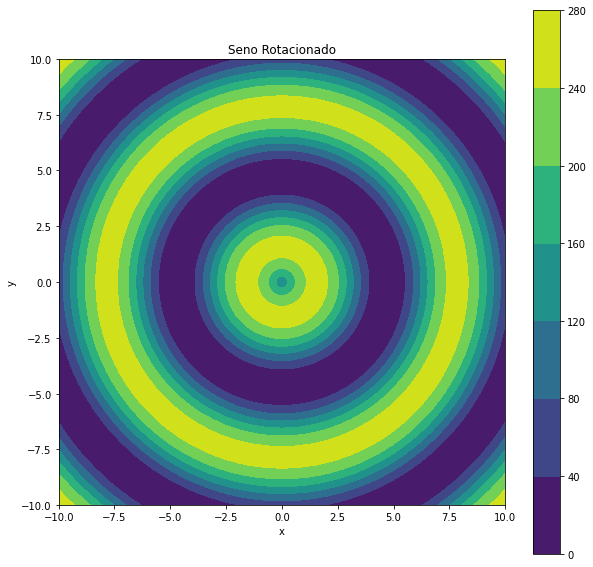

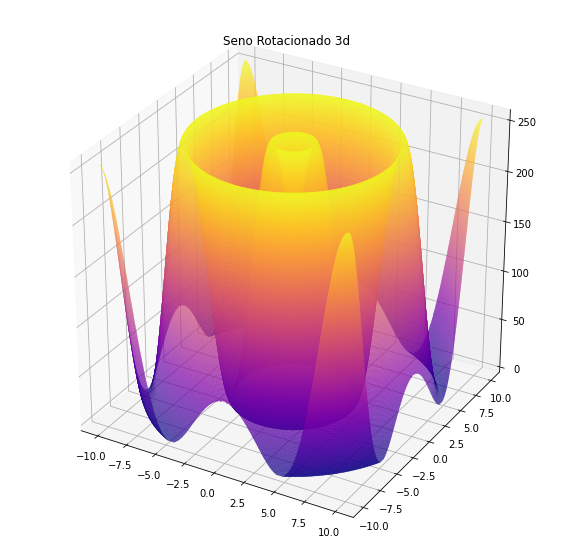

In [ ]:
x = np.linspace(-10, 10, 1001)
y = np.linspace(-10, 10, 1001)

xx, yy = np.meshgrid(x, y)

zz = np.sin(np.sqrt(xx**2 + yy**2))
plotContourf(xx, yy, normalize(zz), "Seno Rotacionado")
plot3d(xx, yy, normalize(zz), "Seno Rotacionado 3d")

3. Create the image of a gaussian in 2D.

In [ ]:
def gaussian(range):
    x = np.arange(range)
    y = np.arange(range)

    xx, yy = np.meshgrid(x, y)
    sigma = 0.3*((range-1)*0.5 - 1) + 0.8

    # Deslocando o centro da gaussiana
    half = int(range/2)
    xx = xx - half
    yy = yy - half

    # Calculando a função gaussiana
    zz = (1/(2*np.pi*(sigma**2)))*np.exp(-(xx**2 + yy**2)/(2*sigma**2))
    plotContourf(xx, yy, normalize(zz), 'Gaussian Bidimensional')
    plot3d(xx, yy, normalize(zz), "Gaussian Bidimensional 3D")
    return normalize(zz)

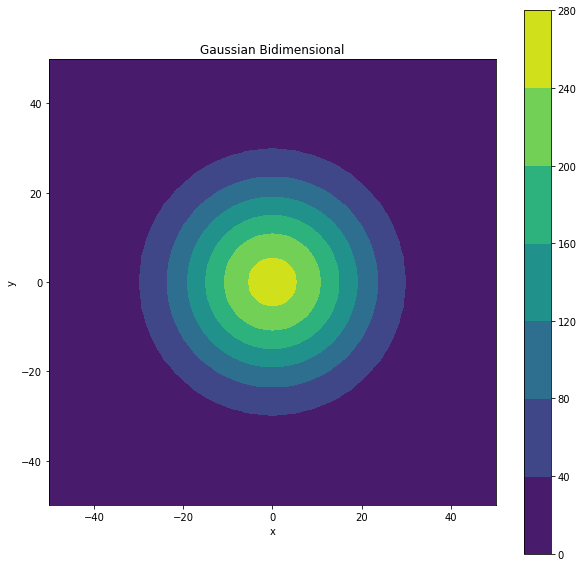

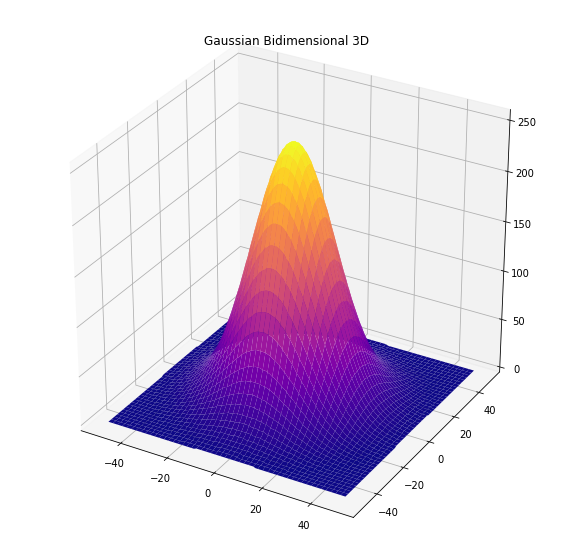

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#print(gauss(11))
gaussian(range = 101)

4. Create a function that generates the image of a Gaussian optionally rotated by an angle \theta and with mx, my, sx, sy as input arguments.

In [ ]:
def gaussian2D(range, mx, my, sx, sy, theta = 0):
    x = np.arange(range[0])
    y = np.arange(range[1])

    xx, yy = np.meshgrid(x, y)

    # Deslocando o centro da gaussiana
    xx = xx - mx
    yy = yy - my

    # Aplicando a rotação theta em relação ao eixo z
    xxr = np.cos(theta)*xx - np.sin(theta)*yy
    yyr = np.sin(theta)*xx + np.cos(theta)*yy

    # Calculando a função gaussiana 2D
    zz = np.exp(-( xxr**2/(2*sx**2) + yyr**2/(2*sy**2) ))
    plotContourf(xxr, yyr, normalize(zz), 'Gaussian Bidimensional')
    plot3d(xxr, yyr, normalize(zz), "Gaussian Bidimensional 3D")
    return normalize(zz)

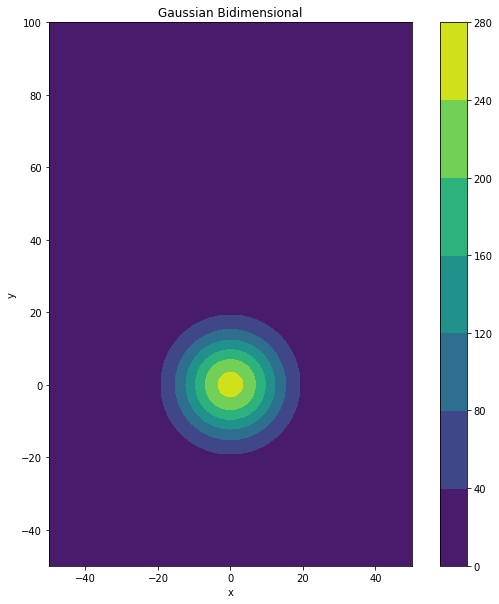

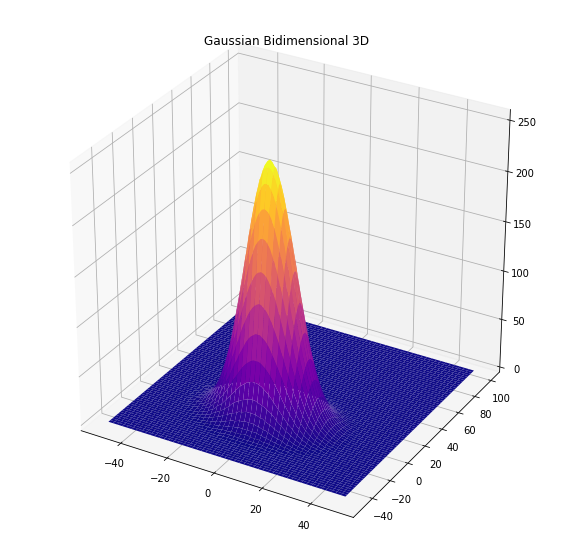

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# mx e my correspondem ao centro da gaussiana, 
# sx e xy correspondem ao desvio padrão da gaussiana,
# enquanto theta correponde à rotação em ralação ao eixo z
gaussian2D(range=(101, 151), mx=50, my=50, sx=10, sy=10)